In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels.shape

(60000,)

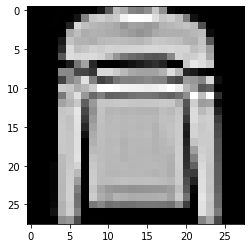

In [13]:
plt.imshow(train_images[5], cmap = 'gray')
plt.show()

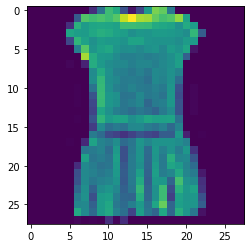

In [19]:
plt.imshow(train_images[3])
plt.show()

In [20]:
train_labels[3]


3

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [22]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [43]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [44]:
history = model.fit(train_images, train_labels, epochs=10, verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4882 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3663 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3301 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3065 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2897 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2758 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2621 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2537 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2426 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.229

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4189 - accuracy: 0.8876

Test accuracy: 0.8876000046730042


In [32]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [33]:
predictions = probability_model.predict(test_images)

In [34]:
predictions[0]

array([1.2236419e-11, 1.0633754e-16, 7.2383247e-17, 2.6431279e-16,
       7.9936903e-16, 1.7433798e-08, 2.6790903e-11, 2.0438411e-04,
       3.2875525e-11, 9.9979562e-01], dtype=float32)

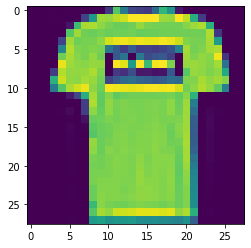

In [39]:
plt.imshow(train_images[1])
plt.show()

In [40]:
predictions = np.around(predictions[1], decimals = 1)

In [41]:
predictions

0.0